# Multiple Linear Regression
## y= m1x1+ m2x2 + .... mnxn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path="https://raw.githubusercontent.com/prateekcsit/Machine-Learning/master/Lemonade.csv"
data=pd.read_csv(path)
data.head(10)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18
5,06/01/2017,Friday,25.3,1.54,23,0.3,11
6,07/01/2017,Saturday,32.9,1.54,19,0.3,13
7,08/01/2017,Sunday,37.5,1.18,28,0.3,15
8,09/01/2017,Monday,38.1,1.18,20,0.3,17
9,10/01/2017,Tuesday,43.4,1.05,33,0.3,18


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [6]:
data.shape

(365, 7)

In [8]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Date']

0     2017-01-01
1     2017-01-02
2     2017-01-03
3     2017-01-04
4     2017-01-05
         ...    
360   2017-12-27
361   2017-12-28
362   2017-12-29
363   2017-12-30
364   2017-12-31
Name: Date, Length: 365, dtype: datetime64[ns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   Day          365 non-null    object        
 2   Temperature  365 non-null    float64       
 3   Rainfall     365 non-null    float64       
 4   Flyers       365 non-null    int64         
 5   Price        365 non-null    float64       
 6   Sales        365 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 20.1+ KB


# EDA

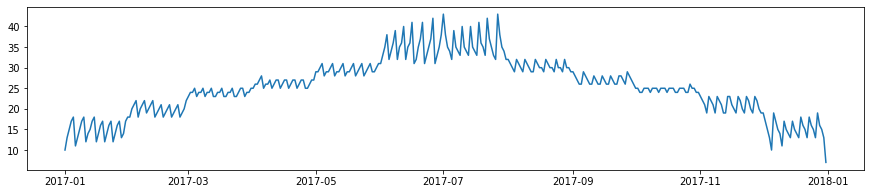

In [12]:
plt.figure(figsize=(15,3))
plt.plot(data['Date'], data['Sales'])
plt.show()

In [15]:
data[data['Sales']==data['Sales'].max()]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,2017-07-01,Saturday,102.9,0.47,59,0.5,43
207,2017-07-27,Thursday,97.9,0.47,74,0.5,43


In [16]:
data[data['Sales']==data['Sales'].min()]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,2017-12-31,Sunday,15.1,2.5,9,0.3,7


In [17]:
data['Temperature'].max()

102.9

In [18]:
data['Temperature'].min()

15.1

In [19]:
data['Day'].value_counts()

Sunday       53
Monday       52
Tuesday      52
Wednesday    52
Thursday     52
Friday       52
Saturday     52
Name: Day, dtype: int64

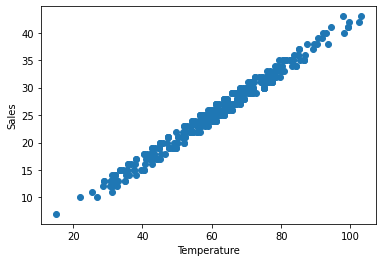

In [20]:
plt.scatter(data['Temperature'],data['Sales'])
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.show()

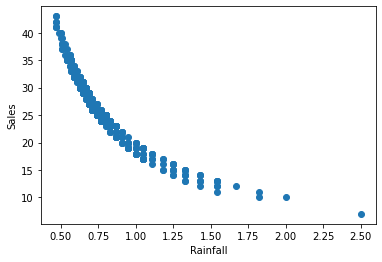

In [22]:
plt.scatter(data['Rainfall'],data['Sales'])
plt.xlabel('Rainfall')
plt.ylabel('Sales')
plt.show()

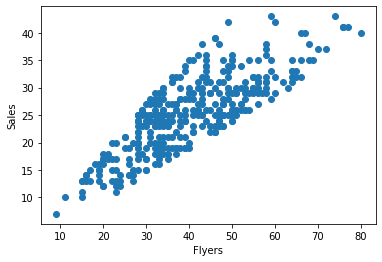

In [23]:
plt.scatter(data['Flyers'],data['Sales'])
plt.xlabel('Flyers')
plt.ylabel('Sales')
plt.show()

In [24]:
data['Price'].value_counts()

0.3    303
0.5     62
Name: Price, dtype: int64

<AxesSubplot:>

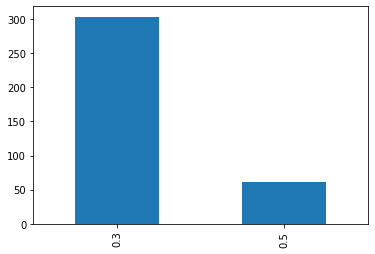

In [25]:
data['Price'].value_counts().plot(kind='bar')

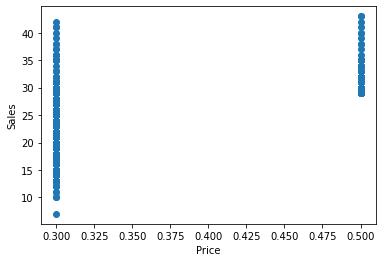

In [26]:
plt.scatter(data['Price'],data['Sales'])
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()

In [27]:
data.groupby('Day').mean()

,Temperature,Rainfall,Flyers,Price,Sales
Day,,,,,
Friday,61.134615,0.817115,40.326923,0.330769,25.384615
Monday,60.888462,0.823462,39.788462,0.334615,25.461538
Saturday,60.930769,0.823077,38.403846,0.334615,25.346154
Sunday,59.769811,0.873585,40.320755,0.333962,24.830189
Thursday,61.125000,0.812500,40.711538,0.334615,25.673077
Tuesday,59.944231,0.829423,41.057692,0.334615,25.134615
Wednesday,61.344231,0.806154,41.384615,0.334615,25.442308


In [28]:
# Temperature, Flyer, Rainfall, Price- m1x1, m2x2, m3x3, m4x4 (sales)

In [29]:
x=data[['Temperature', 'Rainfall', 'Flyers', 'Price' ]]
y=data['Sales']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)


In [31]:
x_test.shape

(92, 4)

In [32]:
x_train.shape

(273, 4)

In [33]:
y_test.shape

(92,)

In [34]:
y_train.shape

(273,)

In [36]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x_train, y_train)

In [40]:
coef=model.coef_ # m1 m2 m3 m4
m1=coef[0]
m2=coef[1]
m3=coef[2]
m4=coef[3]
coef

array([ 0.36848105, -2.54016824,  0.02256083,  1.48908515])

In [49]:
c=model.intercept_
c

3.6289348153280585

In [42]:
pred=model.predict(x_test)
pred

array([33.00261012, 20.96433145, 11.65055939, 21.40943257, 18.8842075 ,
       34.5671284 , 22.55039576, 27.71064323, 33.10151667, 29.21316072,
        7.80730634, 18.14950524, 22.0616028 , 17.63286598, 30.10010709,
       23.93909431,  9.28272462, 24.62467203, 20.39881669, 27.22935803,
       18.14506858, 35.02840051, 24.35887676, 28.38435949, 30.09668522,
       34.66487948, 32.23966533, 25.35412636, 14.65835216, 15.55098023,
       14.49816651, 25.35062148, 23.37986102, 17.5351149 , 33.18651863,
       27.09500784, 23.18575113, 15.92138906, 12.36848424, 22.71792319,
       28.8754564 , 13.53768997, 17.12986876, 25.58724243, 28.3640585 ,
       29.46768215, 23.97569341, 20.0754573 , 10.00527087, 21.66962915,
       29.43920936, 12.8948911 , 25.84167428, 28.22118576, 42.04158661,
       13.38476312, 25.85419971, 18.29020116, 11.61122115, 23.79120389,
       29.60464294, 12.45980662, 24.30983519, 19.99425329, 26.51371172,
       23.35278051, 28.88681981, 28.54411136, 37.53403273, 23.85

In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred, y_test)

0.834980059610911

In [47]:
z=99.5, 0.6, 40, 0.3 # x1,x2,x3,x4 values
w=model.predict([z])
w

C:\Users\sahma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([40.11785688])

In [50]:
w2=99.5*m1+0.6*m2+40*m3+0.3*m4 +c
w2

40.11785687921998